In [96]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# CMP 3002 
## Analyzing algorithms

## Review

program -> algorithm

language -> pseudocode

computer -> model of computation

### Random access machine (RAM) 

![plot](./ram.png)

It allows us to compare algorithms on a performance basis.

Each operation takes 1 time steps (write or read)
Needs to know where the words are to access them
A word is an x number of bits

### Pointer machine

- Simple version of object oriented programming 
- Dynamically allocated objects (create and destroy)
- Objects have a constant number of fields
- Field is either a word or a pointer
- Pointer either points to an object or is null (none in Python)
- Adding values takes 1 time steps
- Following a pointer takes 1 time steps

### Exercise 2
- Write a function that takes calculates the sum of numbers from 1 to *n*, where *n* is the input
- Use a loop to do this
- Count the number of operations this function takes

In [39]:
n = 10
total = 0
for i in range(1, n+1):
    total += i
print(total)

55


### Exercise 3
- Repeat the exercise using a more efficient way
- Count the number of operations this function takes

In [40]:
n = 10
total = n*(n+1)//2
print(total)

55


## Time Analysis

### Loop example

In [9]:
def sum_n(n):
    start = time.time()
    total = 0
    for i in range(1,n+1):
        total += i
    return time.time() - start
        

In [17]:
r = pd.DataFrame()
r['n'] = range(1,10000)

In [33]:
r['time_loop'] = [sum_n(x) for x in r['n']]
r['time_loop'] = 1000000*r['time_loop']

Text(0, 0.5, 'us')

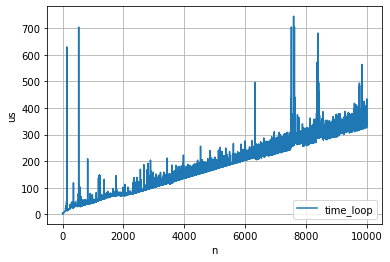

In [35]:
r.plot(x='n', y='time_loop')
plt.grid()
plt.ylabel('us')

### Formula example

In [11]:
def sum_n1(n):
    start = time.time()
    total = n*(n+1)//2
    return time.time() - start

In [36]:
r['time_formula'] = [sum_n1(x) for x in r['n']]
r['time_formula'] = 1000000*r['time_formula']

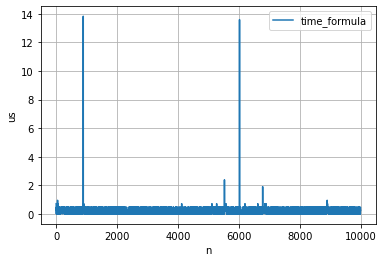

In [37]:
r.plot(x='n', y='time_formula')
plt.ylabel('us')
plt.grid()

### How do they compare? 

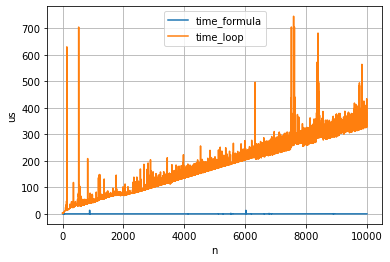

In [38]:
ax = r.plot(x='n', y='time_formula')
r.plot(x='n', y='time_loop', ax=ax)
plt.ylabel('us')
plt.grid()

### Take aways

- We care about how the running time (# operations) scales with the size of the input
- We want a measure of runtime independent of the hardware, programming language, etc
- The performance of the system depends on the algorithm choices and the system hardware

## Insertion sort

- Input: A sequence of $n$ numbers $(a_1, a_2, \dots, a_n)$
- Output: A permutation $(a'_1, a'_2, \dots, a'_n)$ of the input sequence such that $a'_1 \leq a'_2 \leq \dots \leq a'_n$

### Example

![plot](./insertion_sort_example.png)

![plot](./insertion_sort.png)

### Analysis
![plot](insertion_sort_analysis.png)


### Total time

$T(n) = c_1n + c_2(n-1) + c_4(n-1) + c_5 \sum_{j=2}^n t_j + c_6 \sum_{j=2}^n (t_j-1) + c_7 \sum_{j=2}^n (t_j-1) + c_8(n-1)$

**Even for inputs of the same size, the running time might depend on the type of input** 

### Best case:
- The input is sorted, that is $a_1 \leq a_2 \leq \dots \leq a_n$
- $t_j = 1, \forall j$


$T(n) = c_1n + c_2(n-1) + c_4(n-1) + c_5 (n-1) + c_8(n-1)$

$T(n) = (c_1 + c_2 + c_4 + c_5 + c_8)n - (c_2 + c_4 + c_5 + c_8)$

Note that:

$T(n) = an + b$

$a = c_1 + c_2 + c_4 + c_5 + c_8$

$b = -(c_2 + c_4 + c_5 + c_8)$

So $T(n)$ is a **linear function**

### Worst case:
- The input is sorted in reverse, that is $a_1 \geq a_2 \geq \dots \geq a_n$
- $t_j = j, \forall j$
- $\sum_{j=2}^n j = \frac{n(n-1)}{2} - 1$
- $\sum_{j=2}^n (j-1) = \frac{n(n-1)}{2}$


$T(n) = c_1n + c_2(n-1) + c_4(n-1) + c_5 (\frac{n(n-1)}{2} - 1) + c_6 (\frac{n(n-1)}{2}) + c_7 (\frac{n(n-1)}{2}) + c_8(n-1)$

$T(n) = (\frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2})n^2 + (c_1 + c_2 + c_4 + \frac{c_5}{2} - \frac{c_6}{2} - \frac{c_7}{2} + c_8)n - (c_2 + c_4 + c_5 + c_8)$

Note that:

$T(n) = an^2 + bn + c$

$a = \frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2}$

$b = c_1 + c_2 + c_4 + \frac{c_5}{2} - \frac{c_6}{2} - \frac{c_7}{2} + c_8$

$c = -(c_2 + c_4 + c_5 + c_8)$

So $T(n)$ is a **quadratic function**

### Execution time

$(c_1 + c_2 + c_4 + c_5 + c_8)n - (c_2 + c_4 + c_5 + c_8) \leq T(n) \leq (\frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2})n^2 + (c_1 + c_2 + c_4 + \frac{c_5}{2} - \frac{c_6}{2} - \frac{c_7}{2} + c_8)n - (c_2 + c_4 + c_5 + c_8)$


## Growth of functions

### Order (rate) of growth:

- The constants $c_1, c_2, \dots$ represent the cost of each statement (based on the RAM model) but they provide much more detail thatn we really need. We can simplify to:

> $a_1n + b_1 \leq T(n) \leq a_2n^2 + b_2n + c_2$

- We are interested in the rate of growth, we'll consider the term that contributes the most (e.g., $a_2 n^2$)



### Asymptotic notation

- Domain is the natural numbers $\{0, 1, 2, \dots\}$
- Describe the worst-case of $T(n)$

### $\Theta-notation$

> $\Theta(g(n)) = \{f(n) : \exists c_1, c_2, n_0 > 0, \text{such that } 0 \leq c_1g(n) \leq f(n) \leq c_2g(n), \forall n \geq n_0 \}$

- tight bound
- we need two constants that represent an upper bound and a lower bound

$f(n) = T(n)$

$g(n) = n^2$

$lb = c_1 \times g(n)$

$ub = c_2 \times g(n)$

### $O-notation$

> $O(g(n)) = \{f(n) : \exists c, n_0 > 0 \text{ such that } 0 \leq f(n) \leq cg(n), \forall n \geq n_0 \}$

- upper bound

### $\Omega-notation$

> $\Omega(g(n)) = \{f(n) : \exists c, n_0 > 0 \text{ such that } 0 \leq cg(n) \leq f(n), \forall n \geq n_0 \}$

- lower bound

## Important functions

In [75]:
r = pd.DataFrame()
r['n'] = np.arange(1,100,10)
r['n1'] = np.arange(1,100,10)

In [77]:
r['log(n)'] = np.log2(r['n'])
r['sqrt(n)'] = np.sqrt(r['n'])
r['nlog(n)'] = r['n'] * r['log(n)']
r['n^2'] = np.power(r['n'],2)
r['n^3'] = np.power(r['n'],3)
r['2^n'] = np.power(2*np.ones(r.shape[0]),r['n'])


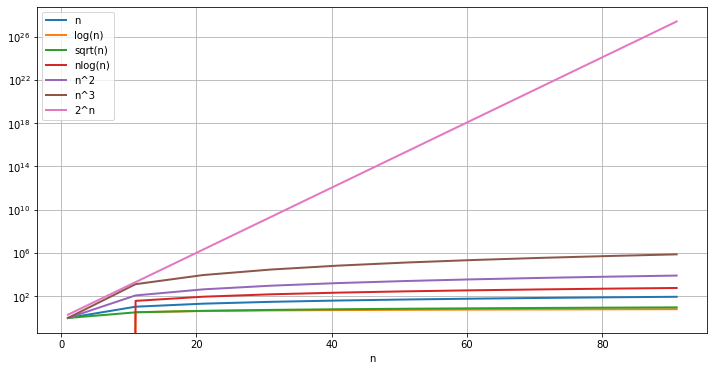

In [93]:
r.plot(x='n1',logy=True, lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()


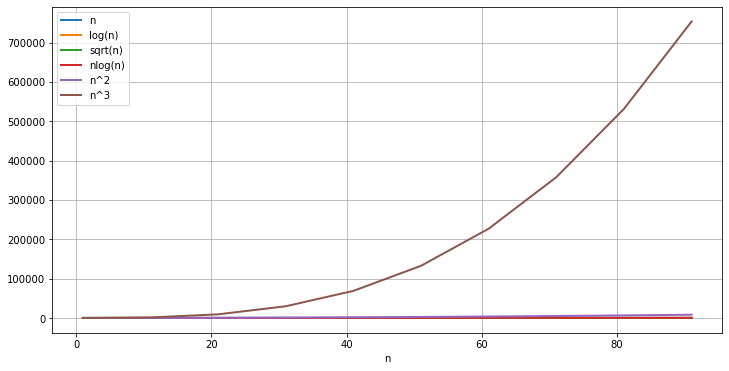

In [79]:
r[['n1','n', 'log(n)', 'sqrt(n)', 'nlog(n)', 'n^2', 'n^3']].plot(x='n1', lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()

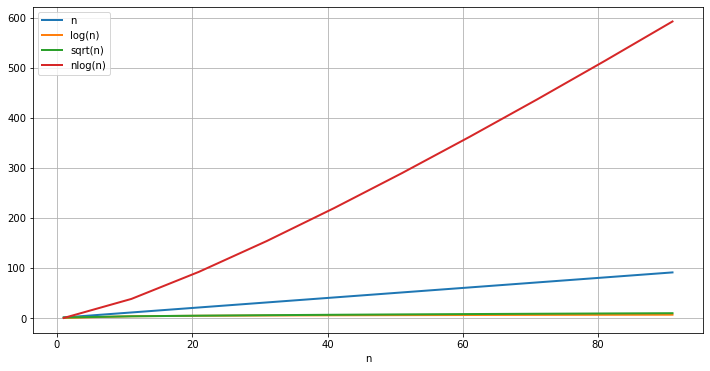

In [82]:
r[['n1','n', 'log(n)', 'sqrt(n)', 'nlog(n)']].plot(x='n1', lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()

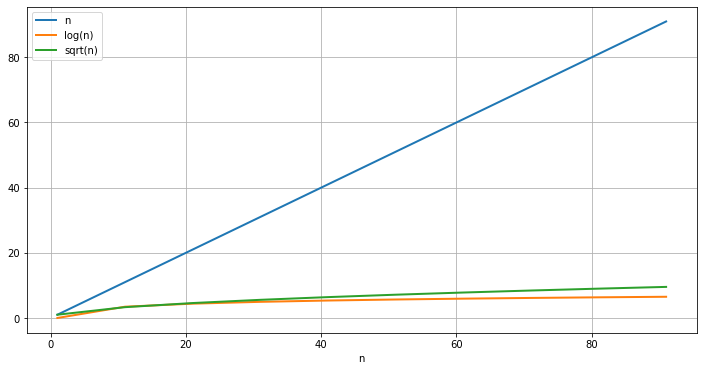

In [84]:
r[['n1','n', 'log(n)', 'sqrt(n)']].plot(x='n1', lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()